In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [ ]:
# Load the dataset
url = "/content/bank.csv"
df = pd.read_csv(url, delimiter=';')


In [ ]:
# Data Preprocessing

# Checking for missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Encoding categorical variables using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Separate the features (X) and target (y)
X = df.drop('y', axis=1)  # Features
y = df['y']  # Target variable (whether the client subscribed or not)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#  Train the Decision Tree Classifier

# Instantiate the classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
#  Make predictions and evaluate the model

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.76%


In [ ]:
# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.58      0.32      0.41       152

    accuracy                           0.90      1357
   macro avg       0.75      0.64      0.68      1357
weighted avg       0.88      0.90      0.88      1357



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1170   35]
 [ 104   48]]


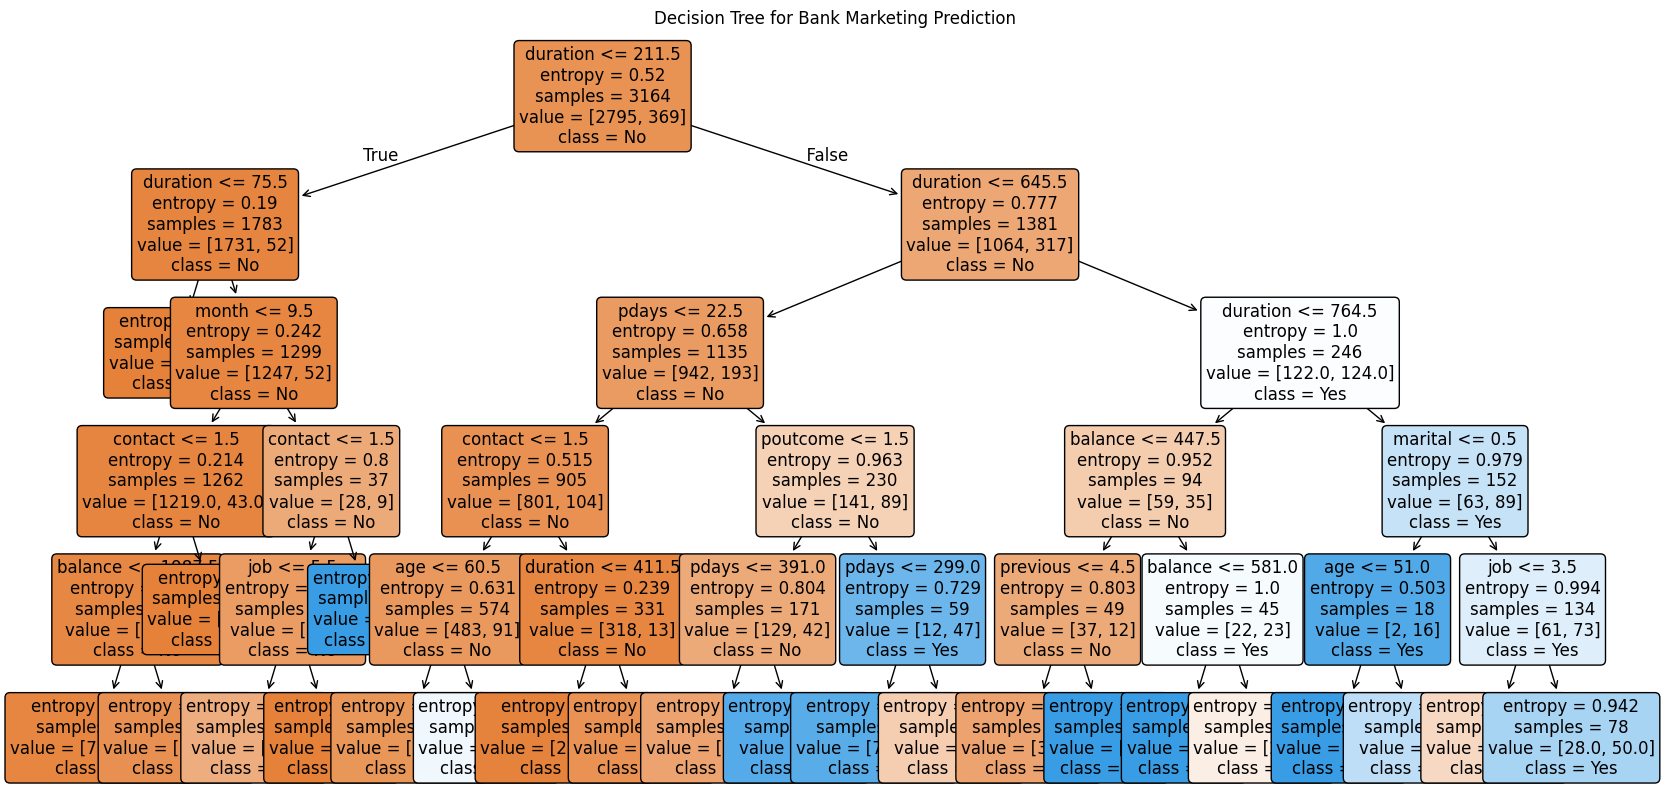

In [ ]:
#  Visualize the Decision Tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree for Bank Marketing Prediction")
plt.show()

<ipython-input-12-b6177608b5bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


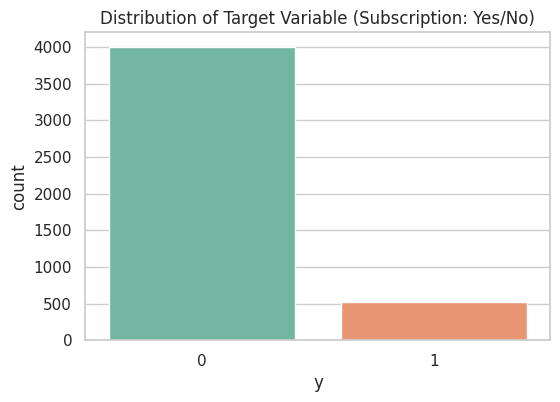

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better-looking plots
sns.set(style="whitegrid")

#  Plot the distribution of the target variable (Subscription: Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Subscription: Yes/No)')
plt.show()

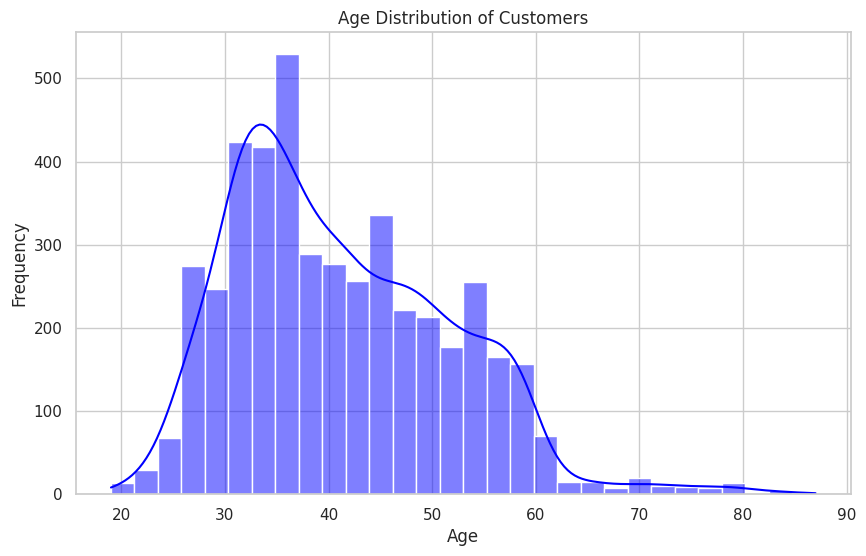

In [ ]:
# Age Distribution of Customers
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

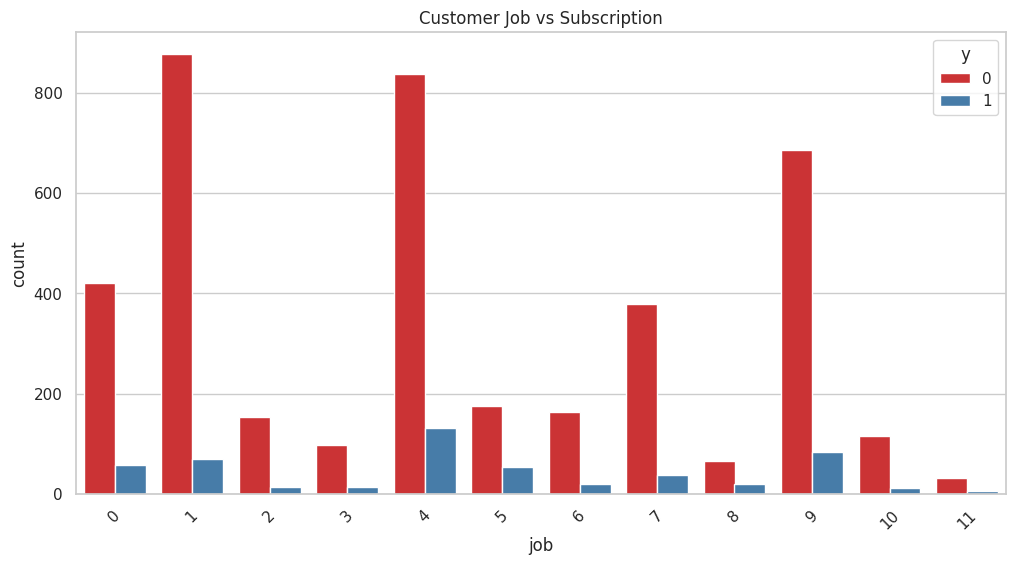

In [ ]:
#  Job vs Subscription (Categorical data visualization)
plt.figure(figsize=(12,6))
sns.countplot(x='job', hue='y', data=df, palette='Set1')
plt.title('Customer Job vs Subscription')
plt.xticks(rotation=45)
plt.show()

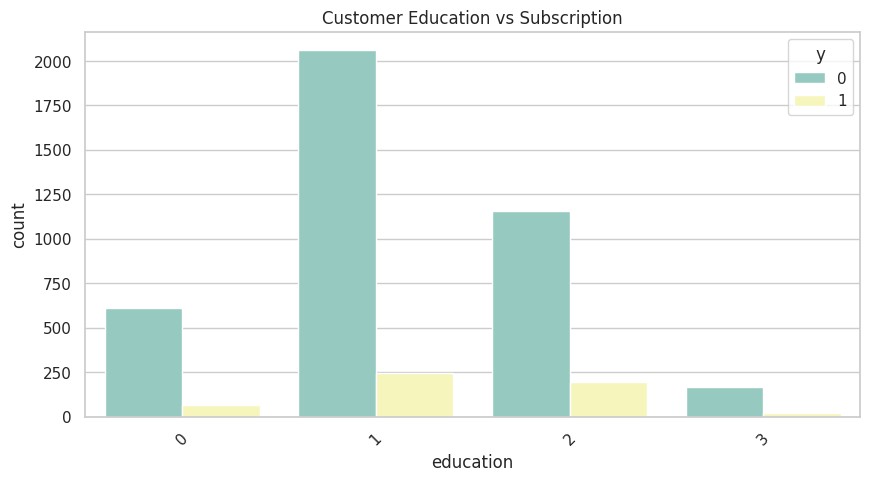

In [ ]:
#  Education vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='y', data=df, palette='Set3')
plt.title('Customer Education vs Subscription')
plt.xticks(rotation=45)
plt.show()


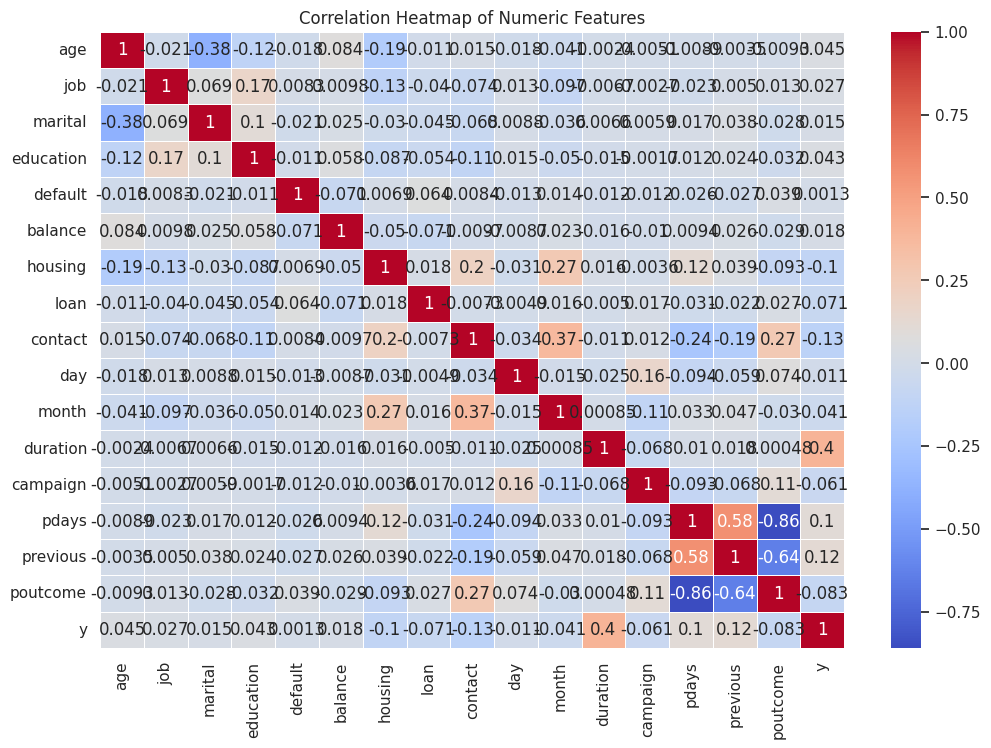

In [ ]:
#  Heatmap of Correlations between Numeric Features
plt.figure(figsize=(12,8))
numeric_cols = df.select_dtypes(include=['int64', 'float64'])  # Select numeric columns
corr_matrix = numeric_cols.corr()  # Calculate the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()